# Denoising auto-encoders (simple/linear or non linear deep) vs PCA 
## avec le jeu de données MNIST

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.datasets import mnist
import numpy as np

Using TensorFlow backend.


##### Création des échantillons d'apprentissage et de test

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


##### Ajout de bruit dans les images

In [4]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [5]:
print(x_train_noisy.shape)
print(x_test_noisy.shape)

(60000, 784)
(10000, 784)


### 1) Simple auto-encoder with keras

In [6]:
from keras.layers import Input, Dense
from keras.models import Model

##### 1.1 Build an auto-encoder architecture

In [7]:
# Size of our encoded representations (compression of input image from 784 floats to 32 floats)
encoding_dim = 32 

# Input placeholder :
input_img = Input(shape=(784,))

# Encoded representation of the input (="encoded") :
encoded = Dense(encoding_dim, activation='linear')(input_img)
# Lossy reconstruction of the input (="decoded") :
decoded = Dense(784, activation='linear')(encoded)

# Model maps an input to its encoded representation :
encoder = Model(input_img, encoded)
# Model maps an input to its reconstruction :
autoencoder = Model(input_img, decoded)

# Placeholder for an encoded (32-dimensional) input :
encoded_input = Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# Decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
                                             
# Pass optimizer (adadelta) with a 'mean squared error" loss
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

##### 1.2 Trained an auto-encoder and predict

In [ ]:
encoded_imgs=[]
decoded_imgs=[]
autoencoder.fit(x_train_noisy, x_train_noisy,nb_epoch=50, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))
encoded_imgs=encoder.predict(x_test_noisy)
decoded_imgs=decoder.predict(encoded_imgs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s - loss: 0.1276 - val_loss: 0.0983

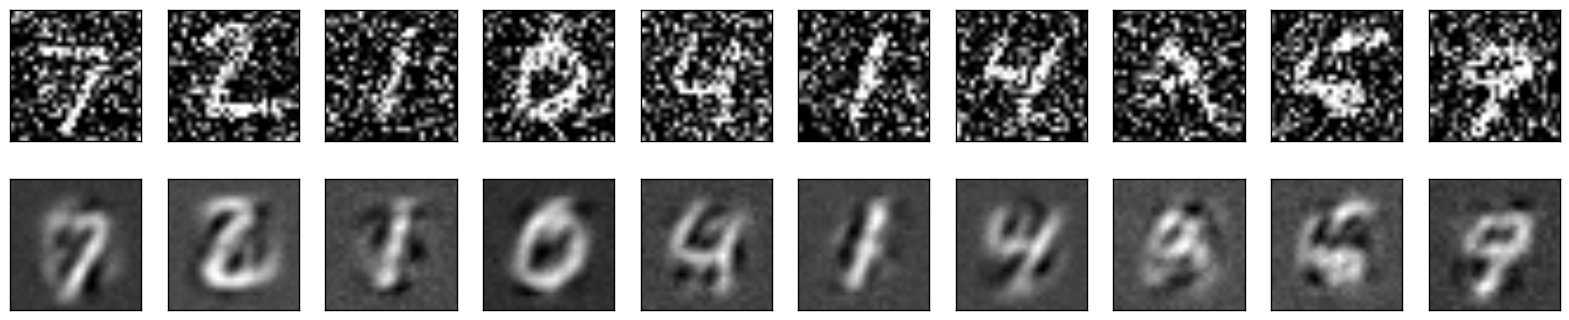

In [10]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### 2) Principal Component Analysis (PCA)

In [11]:
from sklearn.decomposition import PCA

##### 2.1 PCA with 32 axis

In [12]:
pca = PCA(n_components=32)
pca.fit(x_train_noisy)

PCA(copy=True, iterated_power='auto', n_components=32, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

##### 2.2 Application on test sample

In [13]:
X_test_transform=pca.transform(x_test_noisy)
X_test_decoded=pca.inverse_transform(X_test_transform)

##### 2.3 Display decoded images on test sample

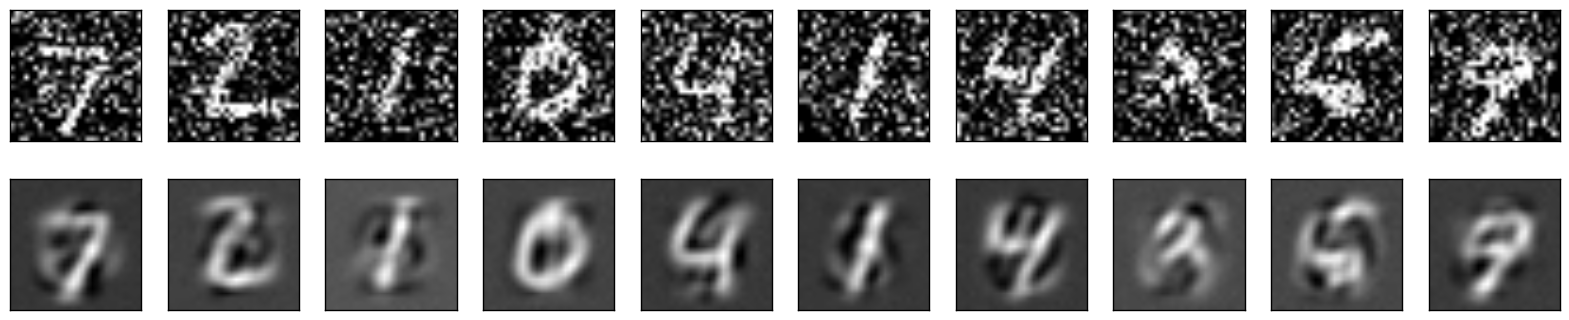

In [15]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_test_decoded[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### 3) Non linear deep Auto-encoder

##### 3.1 Build an non linear deep auto-encoder architecture

In [16]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

deepautoencoder = Model(input_img, decoded)
deepautoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

##### 3.2 Trained an auto-encoder and predict

In [ ]:
deepautoencoder.fit(x_train_noisy, x_train,nb_epoch=50, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 499s - loss: 0.1237 - val_loss: 0.0693

In [18]:
deep_decoded_imgs = deepautoencoder.predict(x_test_noisy)

##### 3.3 Display decoded images after different numbers of periods

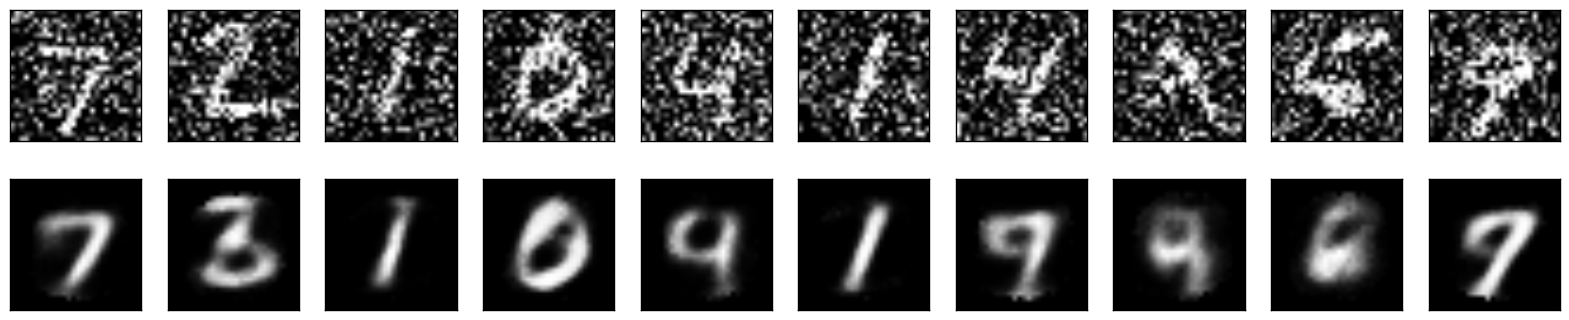

In [19]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(deep_decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### 4) Vérifier la cohérence des résultats (comparaison des labels en sortie)

Nous réalisons un modèle SVM pour identifier le label associé à chaque image. Nous effectuons l'apprentissage sur l'échantillon de test (x_test) puis nous l'appliquons sur les images décompressées (decoded_imgs[9] et X_test_decoded).

In [20]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf', class_weight='balanced')
clf = clf.fit(x_test, y_test)

In [22]:
y_pred_AE = clf.predict(decoded_imgs)
y_pred_deepAE = clf.predict(deep_decoded_imgs)
y_pred_PCA = clf.predict(X_test_decoded)

In [23]:
print("Pourcentage de labels égaux entre AE et PCA :", round(100*len(y_pred_AE[(y_pred_AE-y_pred_PCA)==0])/len(y_pred_AE)), "%")

Pourcentage de labels égaux entre AE et PCA : 92 %


In [24]:
print("Pourcentage de labels égaux entre deep AE et PCA :", round(100*len(y_pred_deepAE[(y_pred_deepAE-y_pred_PCA)==0])/len(y_pred_deepAE)), "%")

Pourcentage de labels égaux entre deep AE et PCA : 67 %


In [25]:
print("Pourcentage de labels égaux entre deep AE et simple AE :", round(100*len(y_pred_deepAE[(y_pred_deepAE-y_pred_AE)==0])/len(y_pred_deepAE)), "%")

Pourcentage de labels égaux entre deep AE et simple AE : 67 %


### 5) Comparer les erreurs de classification (Simple AE vs deep AE vs PCA) sur échantillon de test 

In [27]:
print("Pourcentage d'erreur de classification avec AE :", round(100*len(y_pred_AE[(y_pred_AE-y_test)!=0])/len(y_pred_AE)), "%")

Pourcentage d'erreur de classification avec AE : 29 %


In [28]:
print("Pourcentage d'erreur de classification avec PCA :", round(100*len(y_pred_AE[(y_pred_PCA-y_test)!=0])/len(y_pred_PCA)), "%")

Pourcentage d'erreur de classification avec PCA : 27 %


In [29]:
print("Pourcentage d'erreur de classification avec deep AE :", round(100*len(y_pred_deepAE[(y_pred_deepAE-y_test)!=0])/len(y_pred_deepAE)), "%")

Pourcentage d'erreur de classification avec deep AE : 22 %
